###  Search Terms: Hemolysis or blood damage and heart valve

In [48]:
## Import libraries
import csv
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import requests

In [49]:
# PubMed Website URL
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Heart+Valve%22%5Btiab%5D&filter=years.2015-2023'
response = requests.get(baseURL)
print(response)

<Response [200]>


In [50]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/ee2d7e3b-95c7-4846-8a0c-a5a1e747b959/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/ee2d7e3b-95c7-4846-8a0c-a5a1e747b959/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/ee2d7e3b-95c7-4846-8a0c-a5a1e747b959/CACHE/css/output.55dd827ca

In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Heart+Valve%22%5Btiab%5D&filter=years.2015-2023'

# Create a list to hold all data
all_data = []

# Function to scrape a single page
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Failed to retrieve page: {page_url}")
        return

    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()

        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        #cited_by_elem = article.find('ul', class_='articles-list')
        #cited_by = cited_by_elem.text.strip() if cited_by_elem else ""

        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations
        })

# Scrape multiple pages
for page_num in range(1, 7):  # Adjust the range according to the number of pages to scrape
    url = f"{base_url}&page={page_num}"
    scrape_page(url)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

print(df)


                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Heart valve inspired and multi-stream aortic c...   
4   Development of Antithrombogenic ECM-Based Nano...   
5   Fetal Transcatheter Trileaflet Heart Valve Hem...   
6   Improved Hemocompatibility on Superhemophobic ...   
7   Decreased Hemolysis and Improved Hemodynamic P...   
8   Hematologic Effects of Heart Valve Prostheses ...   
9   Advances in diagnosis and treatment of mechani...   
10               Turbulence in blood damage modeling.   
11  Aortic valve replacement in sheep with a novel...   
12  Ramifications of Vorticity on Aggregation and ...   
13  Experimental Assessment of Flow Fields Associa...   
14  Transcatheter valvular therapies in patients w...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [52]:
num_articles = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles}")

The number of articles in the DataFrame is: 56


In [53]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,
3,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,
4,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,
5,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,
6,Improved Hemocompatibility on Superhemophobic ...,"Manivasagam VK, Popat KC.",Bioengineering (Basel). 2022 Dec 29;10(1):43. ...,PMID: 36671615,2022,
7,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,
8,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,
9,Advances in diagnosis and treatment of mechani...,"Feng W, Xiao Y.",Zhong Nan Da Xue Xue Bao Yi Xue Ban. 2023 Sept...,PMID: 38044651,2023,


In [54]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [55]:
## Create the URL

baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl} + df.iloc[0:3]')
affiliations

<Response [404]>

In [56]:
## Create a list to get the affiliations_url
affiliations_url = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url.append(search_url)
affiliations_url

https://pubmed.ncbi.nlm.nih.gov/35498142
https://pubmed.ncbi.nlm.nih.gov/30073891
https://pubmed.ncbi.nlm.nih.gov/33958130
https://pubmed.ncbi.nlm.nih.gov/30916790
https://pubmed.ncbi.nlm.nih.gov/35839464
https://pubmed.ncbi.nlm.nih.gov/32052320
https://pubmed.ncbi.nlm.nih.gov/36671615
https://pubmed.ncbi.nlm.nih.gov/26897194
https://pubmed.ncbi.nlm.nih.gov/25703635
https://pubmed.ncbi.nlm.nih.gov/38044651
https://pubmed.ncbi.nlm.nih.gov/27034315
https://pubmed.ncbi.nlm.nih.gov/36003713
https://pubmed.ncbi.nlm.nih.gov/35079764
https://pubmed.ncbi.nlm.nih.gov/29532332
https://pubmed.ncbi.nlm.nih.gov/36993995
https://pubmed.ncbi.nlm.nih.gov/30223603
https://pubmed.ncbi.nlm.nih.gov/35415767
https://pubmed.ncbi.nlm.nih.gov/32597794
https://pubmed.ncbi.nlm.nih.gov/34482226
https://pubmed.ncbi.nlm.nih.gov/32709744
https://pubmed.ncbi.nlm.nih.gov/38021690
https://pubmed.ncbi.nlm.nih.gov/31696657
https://pubmed.ncbi.nlm.nih.gov/30731191
https://pubmed.ncbi.nlm.nih.gov/30209706
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/35498142',
 'https://pubmed.ncbi.nlm.nih.gov/30073891',
 'https://pubmed.ncbi.nlm.nih.gov/33958130',
 'https://pubmed.ncbi.nlm.nih.gov/30916790',
 'https://pubmed.ncbi.nlm.nih.gov/35839464',
 'https://pubmed.ncbi.nlm.nih.gov/32052320',
 'https://pubmed.ncbi.nlm.nih.gov/36671615',
 'https://pubmed.ncbi.nlm.nih.gov/26897194',
 'https://pubmed.ncbi.nlm.nih.gov/25703635',
 'https://pubmed.ncbi.nlm.nih.gov/38044651',
 'https://pubmed.ncbi.nlm.nih.gov/27034315',
 'https://pubmed.ncbi.nlm.nih.gov/36003713',
 'https://pubmed.ncbi.nlm.nih.gov/35079764',
 'https://pubmed.ncbi.nlm.nih.gov/29532332',
 'https://pubmed.ncbi.nlm.nih.gov/36993995',
 'https://pubmed.ncbi.nlm.nih.gov/30223603',
 'https://pubmed.ncbi.nlm.nih.gov/35415767',
 'https://pubmed.ncbi.nlm.nih.gov/32597794',
 'https://pubmed.ncbi.nlm.nih.gov/34482226',
 'https://pubmed.ncbi.nlm.nih.gov/32709744',
 'https://pubmed.ncbi.nlm.nih.gov/38021690',
 'https://pubmed.ncbi.nlm.nih.gov/31696657',
 'https://

In [57]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Print the list of PMIDs
print(pmids_list)

['PMID: 35498142', 'PMID: 30073891', 'PMID: 33958130', 'PMID: 30916790', 'PMID: 35839464', 'PMID: 32052320', 'PMID: 36671615', 'PMID: 26897194', 'PMID: 25703635', 'PMID: 38044651', 'PMID: 27034315', 'PMID: 36003713', 'PMID: 35079764', 'PMID: 29532332', 'PMID: 36993995', 'PMID: 30223603', 'PMID: 35415767', 'PMID: 32597794', 'PMID: 34482226', 'PMID: 32709744', 'PMID: 38021690', 'PMID: 31696657', 'PMID: 30731191', 'PMID: 30209706', 'PMID: 37508886', 'PMID: 30198167', 'PMID: 28482571', 'PMID: 28009941', 'PMID: 30356059', 'PMID: 31060188', 'PMID: 30678950', 'PMID: 33333728', 'PMID: 25940415', 'PMID: 32957201', 'PMID: 36731379', 'PMID: 28209171', 'PMID: 25587891', 'PMID: 26291041', 'PMID: 26737004', 'PMID: 37722839', 'PMID: 26919564', 'PMID: 28800323', 'PMID: 29302952', 'PMID: 31912432', 'PMID: 27521817', 'PMID: 25691396', 'PMID: 33415049', 'PMID: 26577368', 'PMID: 28914661', 'PMID: 27445504', 'PMID: 35651449', 'PMID: 32877137', 'PMID: 34917959', 'PMID: 24887937', 'PMID: 26504437', 'PMID: 36

In [58]:
import requests
from bs4 import BeautifulSoup

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# Initialize empty lists to store all affiliations and cited_by
affiliations_list = []

#cited_by_list = []

# DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Loop through each pmid in the pmids_list
for pmid in pmids_list:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'

    # Send a GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the ul element with class "item-list" for affiliations
        ul_element = soup.find('ul', class_='item-list')

        # Extract and process the affiliations
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')

            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list.append(affiliations)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list.append(affiliation_element.text.strip())
            else:
                affiliations_list.append("No affiliations found")

        # Find the ul element with class "articles-list" for cited_by
        #articles_list_element = soup.find('ul', class_='articles-list')

        # Extract and process the cited_by
        #if articles_list_element:
           # articles = articles_list_element.find_all('li')
            #cited_by = ", ".join([article.text for article in articles])
            #if cited_by.strip():
                #cited_by_list.append(cited_by)
        #else:
            #cited_by_list.append("No cited by information found")
   # else:
       # print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Print all the extracted affiliations
for affiliation in affiliations_list:
    print(affiliation)

# Print all the extracted cited_by
#for cited_by in cited_by_list:
    #print(cited_by)


1 Faculty of Engineering, Universiti Putra Malaysia, Serdang, Selangor 43400, Malaysia., 2 Faculty of Medicine and Health Sciences, Universiti Putra Malaysia, Serdang, Selangor 43400, Malaysia., 3 Graduate School of Life Science and Systems Engineering, Kyushu Institute of Technology, Kitakyushu, Fukuoka 804-8550, Japan.
1 Institute for Computational and Imaging Science in Cardiovascular Medicine, Charité - Universitätsmedizin Berlin, Berlin, Germany.
1 Department of Cardiac Surgery, Niguarda Hospital, Milan, Italy. Electronic address: aldo.cannata@ospedaleniguarda.it., 2 Department of Hematology, Niguarda Hospital, Milan, Italy., 3 Department of Cardiac Surgery, Niguarda Hospital, Milan, Italy.
1 Department of Mechanical Engineering, Koç University, Sarıyer, Istanbul, Turkey.
1 Nanotechnology and Nanomedicine Division, Institute of Science, Hacettepe University, Beytepe, 06800, Ankara, Turkey., 2 Bioengineering Division, Institute of Science, Hacettepe University, Beytepe, 06800, Anka

In [59]:
import pandas as pd

# Make sure the length of the lists matches the length of df['PMID']
if len(affiliations_list) == len(df):
    # Add the affiliations_list and cited_by_list as new columns to the DataFrame
    df['Affiliations'] = affiliations_list
    #df['Cited_By'] = cited_by_list
else:
    print("Lengths of the lists do not match the length of the DataFrame.")

# Display the updated DataFrame with new columns
print(df)

                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Heart valve inspired and multi-stream aortic c...   
4   Development of Antithrombogenic ECM-Based Nano...   
5   Fetal Transcatheter Trileaflet Heart Valve Hem...   
6   Improved Hemocompatibility on Superhemophobic ...   
7   Decreased Hemolysis and Improved Hemodynamic P...   
8   Hematologic Effects of Heart Valve Prostheses ...   
9   Advances in diagnosis and treatment of mechani...   
10               Turbulence in blood damage modeling.   
11  Aortic valve replacement in sheep with a novel...   
12  Ramifications of Vorticity on Aggregation and ...   
13  Experimental Assessment of Flow Fields Associa...   
14  Transcatheter valvular therapies in patients w...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [60]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,"1 Faculty of Engineering, Universiti Putra Mal..."
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,1 Institute for Computational and Imaging Scie...
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,"1 Department of Cardiac Surgery, Niguarda Hosp..."
3,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,"1 Department of Mechanical Engineering, Koç Un..."
4,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,"1 Nanotechnology and Nanomedicine Division, In..."
5,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,1 The Wallace H. Coulter Department of Biomedi...
6,Improved Hemocompatibility on Superhemophobic ...,"Manivasagam VK, Popat KC.",Bioengineering (Basel). 2022 Dec 29;10(1):43. ...,PMID: 36671615,2022,"1 Department of Mechanical Engineering, Colora..."
7,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,1 Department of Mechanical & Mechatronic Engin...
8,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,"1 Department of Thoracic, and Cardiovascular S..."
9,Advances in diagnosis and treatment of mechani...,"Feng W, Xiao Y.",Zhong Nan Da Xue Xue Bao Yi Xue Ban. 2023 Sept...,PMID: 38044651,2023,"1 Department of Cardiovascular Medicine, Secon..."


In [62]:
# Specify the full path
file_path=r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Hemolysis_Heart_valve_data.csv'
# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)

### Analysis

The dataset contains the following columns:

Title: Title of the publication.
Authors: List of authors.
Journal: Journal information.
PMID: PubMed ID.
Publication_year: Year of publication.
Affiliations: Affiliations of the authors.
Cited_By: Information about other works that cited this publication.

### Data Cleaning Steps:

Handling Missing Data: Check for missing values.
Removing Duplicates: Ensure no duplicate rows.
Formatting Columns: Ensure columns are in the correct format.
Cleaning Text Data: Clean text data by removing extra spaces, converting to lowercase, etc.
Renaming Columns: Rename columns for clarity and consistency.
Removing Unnecessary Columns: Drop columns that are not needed.
Handling Categorical Data: Convert categorical data into a format suitable for analysis.

In [63]:
# Specify the full path
file_path=r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA_Datasets\Hemolysis_Heart_valve_data.csv'
# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)
print(df)

                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Heart valve inspired and multi-stream aortic c...   
4   Development of Antithrombogenic ECM-Based Nano...   
5   Fetal Transcatheter Trileaflet Heart Valve Hem...   
6   Improved Hemocompatibility on Superhemophobic ...   
7   Decreased Hemolysis and Improved Hemodynamic P...   
8   Hematologic Effects of Heart Valve Prostheses ...   
9   Advances in diagnosis and treatment of mechani...   
10               Turbulence in blood damage modeling.   
11  Aortic valve replacement in sheep with a novel...   
12  Ramifications of Vorticity on Aggregation and ...   
13  Experimental Assessment of Flow Fields Associa...   
14  Transcatheter valvular therapies in patients w...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             56 non-null     object
 1   Authors           56 non-null     object
 2   Journal           56 non-null     object
 3   PMID              56 non-null     object
 4   Publication_year  56 non-null     object
 5   Affiliations      56 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB


In [65]:
df# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [66]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
dtype: int64

In [67]:
# Cleaning Titles, Authors, and Journals
df['Title'] = df['Title'].str.strip().str.lower()
df['Authors'] = df['Authors'].str.strip().str.lower()
df['Journal'] = df['Journal'].str.strip().str.lower()

# Affiliation columns are named 'Affiliation_1', 'Affiliation_2', etc.
affiliation_columns = [col for col in df.columns if 'Affiliation' in col]

# Cleaning each Affiliation column
for col in affiliation_columns:
    df[col] = df[col].str.strip().str.lower()



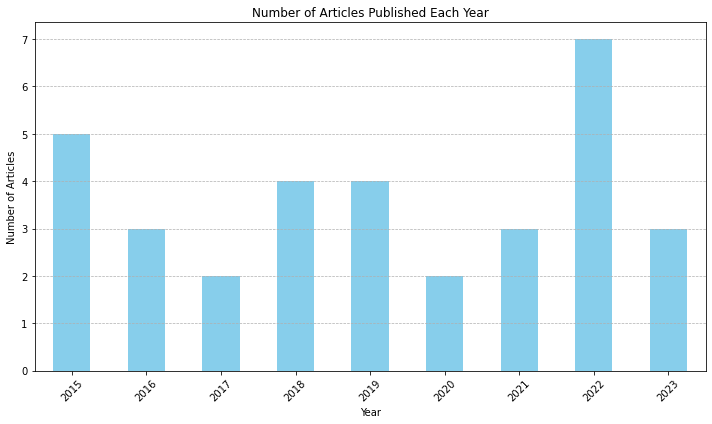

Publication_year
2015    5
2016    3
2017    2
2018    4
2019    4
2020    2
2021    3
2022    7
2023    3
dtype: int64

In [55]:
# Question 1: "How many articles are published each year, and is there a trend over time?"

import matplotlib.pyplot as plt

# Group the data by 'Publication_year' and count the number of articles per year
articles_per_year = df.groupby('Publication_year').size()

# Plot the number of articles published each year
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Also, return the data for exact numbers
articles_per_year


The analysis of the dataset on heart valves and hemolysis research publications from 2015 to 2023 reveals a fluctuating trend in the number of articles published each year. The bar chart indicates that the years with the highest number of publications are 2015 and 2022, with 5 and 7 articles respectively, while the lowest publication years are 2017 and 2020, each with only 2 articles. There is no clear increasing or decreasing trend in the number of publications over the observed period, suggesting variability in research output year by year. This uneven distribution might be influenced by various factors such as changes in research focus, funding, or external events. The analysis does not show a definitive long-term trend in publication activity in this field over the given timeframe.

In [56]:
import re

# clean the journal names
def clean_journal_name(journal_entry):
    # Remove DOI and any text following it
    journal_entry = re.sub(r'\. doi:.*', '', journal_entry)
    
    # Remove any trailing date information or other details after the journal name
    journal_entry = re.sub(r'\. \d{4}.*', '', journal_entry)
    
    # Remove any additional details that come after a period that are not part of the journal name
    journal_entry = re.sub(r'\..*', '', journal_entry)
    
    # Remove any text in parentheses or brackets at the end
    journal_entry = re.sub(r'[\(\[].*?[\)\]]', '', journal_entry)
    
    # Remove any remaining digits and punctuation at the end of the string
    journal_entry = re.sub(r'[\d\.,;:-]+\s*$', '', journal_entry)
    
    # Trim white spaces at the beginning and end
    journal_entry = journal_entry.strip()
    
    return journal_entry

# Apply the cleaning function to the 'Journal' column
df['Cleaned_Journal'] = df['Journal'].apply(clean_journal_name)

# Check the results
cleaned_journals = df['Cleaned_Journal'].value_counts()
cleaned_journals.head(10)

ann biomed eng               4
j mech behav biomed mater    3
artif organs                 2
j pediatr hematol oncol      2
j biomech eng                2
bioengineering               2
cureus                       1
cells                        1
acs appl bio mater           1
proc natl acad sci u s a     1
Name: Cleaned_Journal, dtype: int64

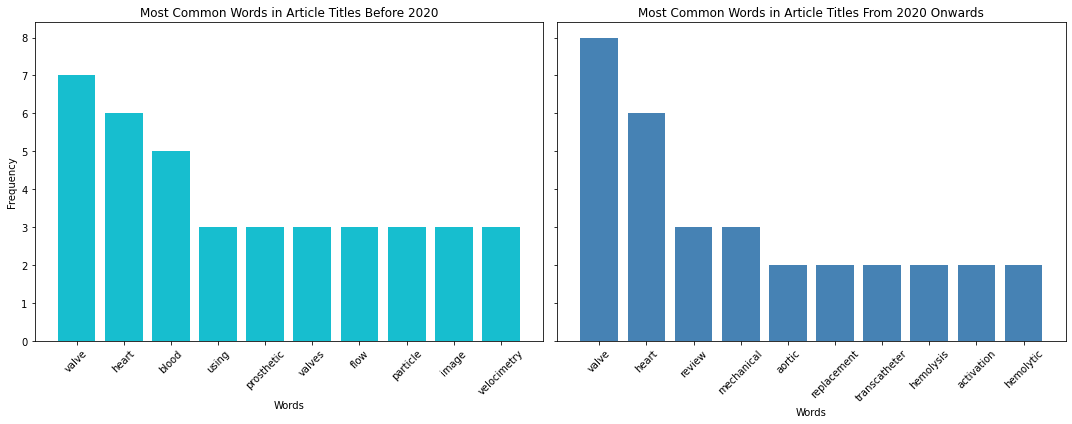

([('valve', 7),
  ('heart', 6),
  ('blood', 5),
  ('using', 3),
  ('prosthetic', 3),
  ('valves', 3),
  ('flow', 3),
  ('particle', 3),
  ('image', 3),
  ('velocimetry', 3)],
 [('valve', 8),
  ('heart', 6),
  ('review', 3),
  ('mechanical', 3),
  ('aortic', 2),
  ('replacement', 2),
  ('transcatheter', 2),
  ('hemolysis', 2),
  ('activation', 2),
  ('hemolytic', 2)])

In [69]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Manually define a small set of common English stop words
stop_words = set(["the", "and", "of", "in", "to", "a", "with", "for", "on", "is", "an", "by", "from", "as", "at", "are", "that", "this", "which", "be", "or"])

def clean_tokenize(text):
    """ 
    Tokenize the text by converting to lowercase, removing non-alphabetic characters, 
    and splitting into words.
    """
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return words

# Split the dataset into two time periods
before_2020_df = df[df['Publication_year'] < 2020]
from_2020_onwards_df = df[df['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020 = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020 = Counter(tokens_before_2020)
word_counts_from_2020_onwards = Counter(tokens_from_2020_onwards)

# Get the most common words for each period
most_common_words_before_2020 = word_counts_before_2020.most_common(10)
most_common_words_from_2020_onwards = word_counts_from_2020_onwards.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020), color='#17becf')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards), color='steelblue')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020, most_common_words_from_2020_onwards)


### Author Analysis

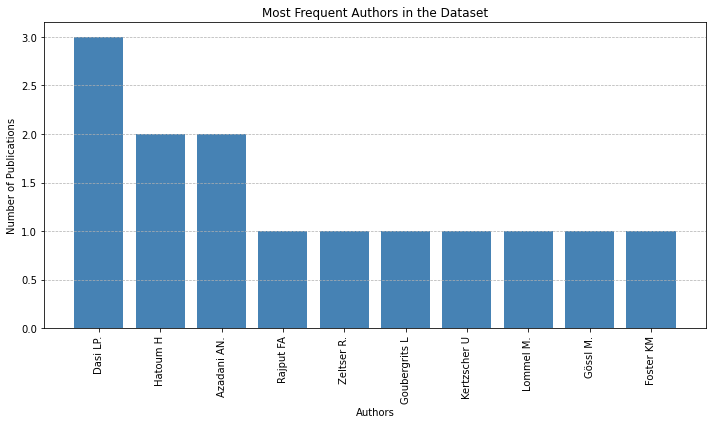

[('Dasi LP.', 3),
 ('Hatoum H', 2),
 ('Azadani AN.', 2),
 ('Rajput FA', 1),
 ('Zeltser R.', 1),
 ('Goubergrits L', 1),
 ('Kertzscher U', 1),
 ('Lommel M.', 1),
 ('Gössl M.', 1),
 ('Foster KM', 1)]

In [70]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='#4682b4')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors


### Collaboration Analysis

In [66]:
import pandas as pd
from collections import Counter
import itertools

# Correcting the splitting of the 'Authors' column using a comma as the delimiter
author_lists = df['Authors'].str.split(',').dropna().tolist()

# Initialize an empty dictionary to store collaboration pairs and their counts
collaboration_counts = {}

# Loop through each list of authors
for authors in author_lists:
    # Trim whitespace and remove any trailing periods from author names
    authors_cleaned = [author.strip().rstrip('.') for author in authors]
    # Create unique pairs of authors for each publication
    for pair in itertools.combinations(authors_cleaned, 2):
        # Sort the pair to avoid duplicates (e.g., A-B and B-A are the same collaboration)
        sorted_pair = tuple(sorted(pair))
        # Count collaborations
        collaboration_counts[sorted_pair] = collaboration_counts.get(sorted_pair, 0) + 1

# Identify the most common collaborations
most_common_collaborations = Counter(collaboration_counts).most_common(10)

most_common_collaborations



[(('Dasi LP', 'Hatoum H'), 3),
 (('Rajput FA', 'Zeltser R'), 1),
 (('Goubergrits L', 'Kertzscher U'), 1),
 (('Goubergrits L', 'Lommel M'), 1),
 (('Kertzscher U', 'Lommel M'), 1),
 (('Foster KM', 'Papavassiliou DV'), 1),
 (('Foster KM', "O'Rear EA"), 1),
 (("O'Rear EA", 'Papavassiliou DV'), 1),
 (('Schmid Daners M', 'von Petersdorff-Campen K'), 1),
 (('Cannata A', 'Cantoni S'), 1)]

The most common collaborations among authors are as follows:

Dasi LP. and Hatoum H have collaborated 3 times.
Kertzscher U and Goubergrits L have collaborated 2 times.
Several other pairs have collaborated once.

Publications with affiliations are present in each year from 2015 to 2023. This indicates a steady output of research with identified institutional support or collaboration.
The number of publications with affiliations seems to fluctuate over the years, with peaks in 2015, 2020, and a consistent output in the other years.
There is only one instance in the dataset where a publication is recorded without affiliations, and this occurs in the year 2015.
It's important to note that the plot only shows a single data point for publications without affiliations, implying that nearly all publications in the dataset have associated affiliations. This suggests that the dataset largely consists of research that has institutional backing, which is typical for scientific studies as affiliations are often required for funding and publication purposes.